# Hypothesis Testing - Cumulative Lab

## Introduction

In this cumulative lab, you will use pandas to clean up a dataset and perform some EDA, then perform statistical tests and interpret their results in order to answer some business questions.

## Objectives

You will be able to:

* Practice using a data dictionary
* Practice using pandas to prepare data for statistical analysis
* Practice identifying an appropriate statistical test for a given question
* Practice defining the null and alternative hypotheses
* Practice executing statistical tests and interpreting their results

## Your Task: Analyzing Health Trends

![tissues and tea mug](images/sick_day.jpg)

Photo by <a href="https://unsplash.com/@kellysikkema?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Kelly Sikkema</a> on <a href="/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Business Understanding

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of the 2017-2018 survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1. How does health status, represented by average number of days with bad physical health in the past month (`PHYSHLTH`), differ by state?					 								
2. Digging deeper into the data, what are some factors that impact health (demographics, behaviors, etc.)?	

### Data Understanding

To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`.

There is also a PDF data dictionary called `data_dictionary.pdf`, which explains the meanings of the features and codes contained in this dataset.

Both files are located in the `data/` directory of this repository.

Prior to each statistical test, you will need to perform some data preparation, which could include:

* Filtering out rows with irrelevant values
* Transforming data from codes into human-readable values
* Binning data to transform it from numeric to categorical
* Creating new columns based on queries of the values in other columns

For steps 2-5, you will need to select and execute an appropriate statistical test. Recall these tests we have learned so far:

1. [Chi-squared test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html): used for comparing a categorical feature against a categorical feature, to determine whether they are independent
2. [t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html): used for comparing two categories of a numeric feature, to determine whether their means are the same across categories
3. [ANOVA](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html#statsmodels.stats.anova.anova_lm): used for comparing more than two categories of a numeric feature, to determine whether their means are the same across categories

### Requirements

#### 1. Prepare `PHYSHLTH` Data for Analysis

Using the data dictionary, ensure that you understand the meaning of the `PHYSHLTH` column. Then clean the data so that only valid records of `PHYSHLTH` remain.

#### 2. Describe the Distribution of Health Status by State

Does health status (`PHYSHLTH`) differ by state (`STATE_`)? If so, by how much, and is it statistically significant?

#### 3. Describe the Relationship between Health Status and Home Ownership Status

Does health status (`PHYSHLTH`) differ between home owners and renters (`RENTHOM1`)? If so, by how much, and is it statistically significant?

#### 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Does chronic sickness (`PHYSHLTH >= 15`) differ based on nicotine use (various columns)? If so, by how much, and is it statistically significant?

#### 5. Choose Your Own Question

Thinking about the business case, what is another question that might be useful to answer? Perform all analysis steps to answer this question.

## 1. Prepare `PHYSHLTH` Data for Analysis

In the cells below, we include the relevant imports and load the data into a dataframe called `df`:

In [23]:
# Run this cell without changes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [24]:
# Run this cell without changes
df = pd.read_csv("data/case_study.csv", index_col=0, low_memory=False)
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


Our main column of interest is called `PHYSHLTH`. We display summary statistics and plot a distribution below:

In [25]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

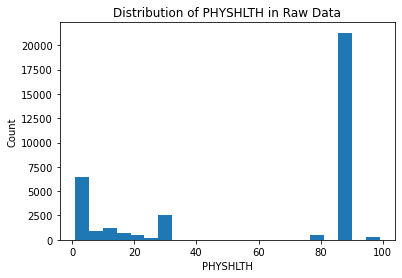

In [26]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"], bins="auto")
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Raw Data");

This feature is supposed to represent the number of days with bad physical health out of the past 30 days. Do you see anything wrong with what is displayed above? Explain.

In [27]:
# Replace None with appropriate text
"""
The data contains invalid codes (77, 88, 99) representing survey responses such as “Don’t know/Refused/Missing,” which inflate the distribution beyond 30 days. These must be cleaned before analysis. 

"""

'\nThe data contains invalid codes (77, 88, 99) representing survey responses such as “Don’t know/Refused/Missing,” which inflate the distribution beyond 30 days. These must be cleaned before analysis. \n\n'

Look in the data dictionary, page 17, to understand what is happening with these values. Then edit the cell below so:

* The records where the `PHYSHLTH` value label is `None` are converted to 0
* The records where the `PHYSHLTH` value label is `Number of days` are kept as-is
* All other records are dropped (i.e. records with `Don't know/Not sure`, `Refused`, and `Not asked or Missing` value labels for `PHYSHLTH` are dropped)

In [28]:
# Your code here

# Convert 88 ("None") to 0
df["PHYSHLTH"] = df["PHYSHLTH"].replace(88, 0)

# Keep only valid values: 0–30
df = df[(df["PHYSHLTH"] >= 0) & (df["PHYSHLTH"] <= 30)]


Run the code below to ensure you have the correct, cleaned dataframe:

In [29]:
# Run this cell without changes

# We should have fewer rows, the same number of columns
assert df.shape == (33747, 358)

# The maximum value in this column should now be 30
assert df["PHYSHLTH"].max() == 30.0

Now we can look at the same descriptive information on our cleaned data:

In [30]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

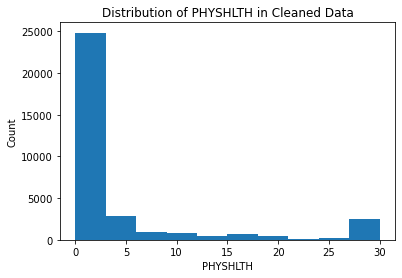

In [31]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"])
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Cleaned Data");

That looks a lot more reasonable. Let's move on to the next step.

## 2. Describe the Distribution of Health Status by State

As mentioned previously, this dataset only includes data from three states.

In [32]:
# Run this cell without changes
df["_STATE"].value_counts()

36.0    11876
34.0    11458
9.0     10413
Name: _STATE, dtype: int64

Look in the data dictionary, pages 2-3, to determine which states map onto which codes. Then replace the numbers with strings representing the state names.

In [33]:
# Your code here
df = df.dropna(subset=["_STATE"])

# Work on df in place, avoiding SettingWithCopyWarning
df.loc[:, "_STATE"] = pd.to_numeric(df["_STATE"], errors="coerce")

# Double-check unique codes before mapping
print("Unique codes in _STATE before mapping:", df["_STATE"].unique())

# Map state codes to names
state_map = {
    9: "Connecticut",
    34: "New Jersey",
    36: "New York"
}

df.loc[:, "_STATE"] = df["_STATE"].map(state_map)

# Verify mapping worked
print("Unique values after mapping:", df["_STATE"].unique())

df["_STATE"].value_counts()





Unique codes in _STATE before mapping: [ 9. 34. 36.]
Unique values after mapping: ['Connecticut' 'New Jersey' 'New York']


New York       11876
New Jersey     11458
Connecticut    10413
Name: _STATE, dtype: int64

Below, we check the values:

In [34]:
# Run this cell without changes

# Shape should be the same
assert df.shape == (33747, 358)

# Values in state column should be changed
assert sorted(list(df["_STATE"].value_counts().index)) == ['Connecticut', 'New Jersey', 'New York']

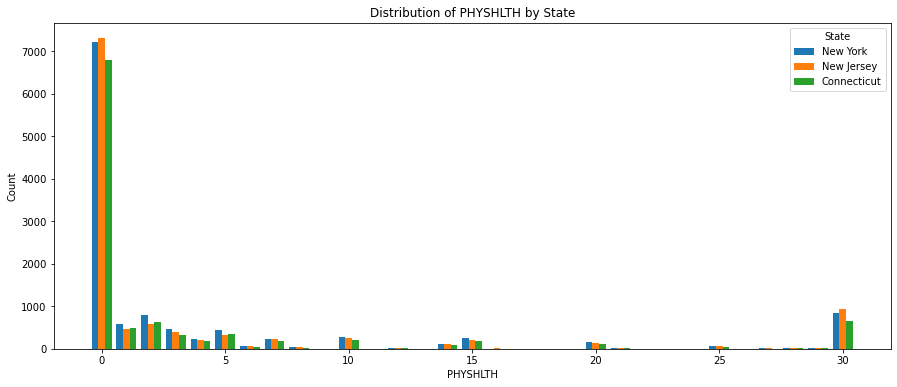

In [35]:
# Run this cell without changes

ny = df.loc[df["_STATE"] == "New York", "PHYSHLTH"]
nj = df.loc[df["_STATE"] == "New Jersey", "PHYSHLTH"]
ct = df.loc[df["_STATE"] == "Connecticut", "PHYSHLTH"]

fig, ax = plt.subplots(figsize=(15, 6))

ax.hist(
    x=[ny, nj, ct],
    label=["New York", "New Jersey", "Connecticut"],
    bins=range(32),
    align="left"
)

ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH by State")

ax.legend(title="State");

Looking at the plot above, does the distribution seem to differ by state?

(Just answer based on a visual inspection; we will do the statistical assessment next.)

In [46]:
# Replace None with appropriate text
"""

Based on visual inspection of the histogram, the distributions of PHYSHLTH 
are very similar across New York, New Jersey, and Connecticut. 

Each state shows a strong peak at 0 (indicating no poor physical health days) 
and a right-skewed tail as the number of days increases. 

There may be small differences in height, but overall the shapes of the 
distributions do not differ substantially by state.


"""

'\n\nBased on visual inspection of the histogram, the distributions of PHYSHLTH \nare very similar across New York, New Jersey, and Connecticut. \n\nEach state shows a strong peak at 0 (indicating no poor physical health days) \nand a right-skewed tail as the number of days increases. \n\nThere may be small differences in height, but overall the shapes of the \ndistributions do not differ substantially by state.\n\n\n'

For the statistical test, we will be comparing the *means* of `PHYSHLTH` across states, as a representation of the overall distribution. In other words, when operationalizing the question **does `PHYSHLTH` differ by state?** we want to answer that in terms of the mean `PHYSHLTH`.

Let's look at those means:

In [47]:
# Run this cell without changes
df.groupby("_STATE")["PHYSHLTH"].mean()

_STATE
Connecticut    3.688562
New Jersey     4.380957
New York       4.148030
Name: PHYSHLTH, dtype: float64

You likely noted that the overall distribution looked about the same, but these means are different. We have a range from Connecticut with about 3.7 days of bad health to New Jersey with about 4.4 days. But is that difference statistically significant?

Identify which of the statistical tests you have learned is the most appropriate for this question, and why. Make sure you mention what kinds of variables are being compared (numeric and categorical), and how many categories there are.

In [48]:
# Replace None with appropriate text
"""

The most appropriate test here is a one-way ANOVA (Analysis of Variance).

We are comparing the means of a numeric variable (PHYSHLTH: number of 
physically unhealthy days) across more than two categories of a categorical 
variable (_STATE: Connecticut, New Jersey, New York).

Because we have one numeric dependent variable and one categorical independent 
variable with three groups, a one-way ANOVA is the correct choice.


"""

'\n\nThe most appropriate test here is a one-way ANOVA (Analysis of Variance).\n\nWe are comparing the means of a numeric variable (PHYSHLTH: number of \nphysically unhealthy days) across more than two categories of a categorical \nvariable (_STATE: Connecticut, New Jersey, New York).\n\nBecause we have one numeric dependent variable and one categorical independent \nvariable with three groups, a one-way ANOVA is the correct choice.\n\n\n'

Now, identify the null and alternative hypotheses:

In [49]:
# Replace None with appropriate text
"""
Null hypothesis (H0): The mean number of physically unhealthy days (PHYSHLTH) 
is the same across all three states (Connecticut, New Jersey, New York).

Alternative hypothesis (H1): At least one state has a different mean number of 
physically unhealthy days compared to the others.
"""


'\nNull hypothesis (H0): The mean number of physically unhealthy days (PHYSHLTH) \nis the same across all three states (Connecticut, New Jersey, New York).\n\nAlternative hypothesis (H1): At least one state has a different mean number of \nphysically unhealthy days compared to the others.\n'

In the cell below, we set up and execute the statistical test for you. If this doesn't match your previous answer about which test to perform, look at the solution branch to understand why this is the appropriate test.

In [50]:
# Run this cell without changes
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'PHYSHLTH ~ C(_STATE)'
lm = ols(formula, df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(_STATE),2.0,2.687322e+03,1343.660882,18.558645,8.800607e-09
Residual,33744.0,2.443093e+06,72.400809,NaN,NaN


Interpret the results of this statistical test below. What is the calculated p-value? Were we able to reject the null hypothesis at an alpha of 0.05? What does this say about how `PHYSHLTH` varies by state? What recommendations would you make to the business?

In [51]:
# Replace None with appropriate text
"""
The ANOVA results show a p-value of approximately 8.8e-09, which is far below 
the alpha level of 0.05. Therefore, we reject the null hypothesis that the mean 
number of physically unhealthy days (PHYSHLTH) is the same across the three states.

This means that there are statistically significant differences in average 
physical health status by state. Specifically, Connecticut has the lowest mean 
(~3.7 days), New Jersey has the highest (~4.4 days), and New York is in between 
(~4.1 days).

For the business, this suggests that regional differences in physical health 
should be taken into account. For example, health-related services, wellness 
programs, or insurance offerings may need to be tailored by state to address 
these differences.
"""


'\nThe ANOVA results show a p-value of approximately 8.8e-09, which is far below \nthe alpha level of 0.05. Therefore, we reject the null hypothesis that the mean \nnumber of physically unhealthy days (PHYSHLTH) is the same across the three states.\n\nThis means that there are statistically significant differences in average \nphysical health status by state. Specifically, Connecticut has the lowest mean \n(~3.7 days), New Jersey has the highest (~4.4 days), and New York is in between \n(~4.1 days).\n\nFor the business, this suggests that regional differences in physical health \nshould be taken into account. For example, health-related services, wellness \nprograms, or insurance offerings may need to be tailored by state to address \nthese differences.\n'

With that section wrapped up, let's move on to the next step.

## 3. Describe the Relationship between Health Status and Home Ownership Status

This time, we want to categorize respondents by demographic information: specifically, we'll look at whether or not they own their home.

Once again, this will require some data preparation. The variable of interest is contained in the `RENTHOM1` column. Currently the values look like this:

In [52]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

1.0    21690
2.0    10244
3.0     1526
9.0      194
7.0       93
Name: RENTHOM1, dtype: int64

In the cell below, modify `df` so that we have dropped all records where the `RENTHOM1` value label is neither `Own` nor `Rent`, and we have replaced the numeric codes with `Own` and `Rent` respectively. You can find more information about codes on page 33 of the data dictionary.

In [53]:
# Your code here
# Keep only Own (1) and Rent (2), drop others
df = df[df["RENTHOM1"].isin([1, 2])]

# Map numeric codes to labels
rent_map = {
    1: "Own",
    2: "Rent"
}
df.loc[:, "RENTHOM1"] = df["RENTHOM1"].map(rent_map)

# Quick check
print(df["RENTHOM1"].value_counts())


Own     21690
Rent    10244
Name: RENTHOM1, dtype: int64


C:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [54]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

Own     21690
Rent    10244
Name: RENTHOM1, dtype: int64

Below, we check that this was done correctly:

In [55]:
# Run this cell without changes

# Number of rows should be smaller again
assert df.shape == (31934, 358)

# Only two values should be present in this column
assert sorted(list(df["RENTHOM1"].value_counts().index)) == ['Own', 'Rent']

Now, similar to the previous step, create a plot that shows the distribution of `PHYSHLTH` for those who own vs. rent their homes, including appropriate axis labels and legend. Because there is more of an imbalance of categories this time (more than twice as many owners as renters, compared to nearly-even numbers from New York, New Jersey, and Connecticut), make sure you add the argument `density=True`, so that the y-axis shows the density (proportion) rather than the count.

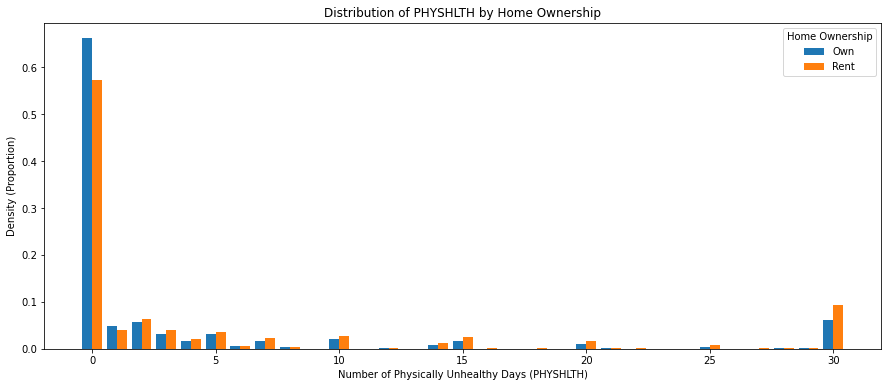

In [56]:
# Your code here
# Distribution plot of PHYSHLTH by home ownership
owners = df.loc[df["RENTHOM1"] == "Own", "PHYSHLTH"]
renters = df.loc[df["RENTHOM1"] == "Rent", "PHYSHLTH"]

fig, ax = plt.subplots(figsize=(15, 6))

ax.hist(
    [owners, renters],
    label=["Own", "Rent"],
    bins=range(32),
    align="left",
    density=True  # ensures proportions instead of raw counts
)

ax.set_xlabel("Number of Physically Unhealthy Days (PHYSHLTH)")
ax.set_ylabel("Density (Proportion)")
ax.set_title("Distribution of PHYSHLTH by Home Ownership")
ax.legend(title="Home Ownership")
plt.show()


Then run this code to find the averages:

In [57]:
# Run this cell without changes
df.groupby("RENTHOM1")["PHYSHLTH"].mean()

RENTHOM1
Own     3.531213
Rent    5.197970
Name: PHYSHLTH, dtype: float64

Now, interpret the plot and averages. Does it seem like there a difference in the number of unhealthy days between those who rent their homes and those who own their homes? How does this compare to the distributions by state?

In [58]:
# Replace None with appropriate text
"""
The histogram shows that both owners and renters have similar right-skewed 
distributions, with a large proportion reporting 0 days of poor physical health. 
However, renters appear to have a slightly higher density at higher numbers of 
unhealthy days.

The group means confirm this: renters have a higher average number of unhealthy 
days compared to owners. This suggests renters may report somewhat worse health.

Compared to the state-level distributions, the difference by ownership status 
seems more pronounced: the gap between Own and Rent is larger than the 
differences observed among Connecticut, New Jersey, and New York.
"""


'\nThe histogram shows that both owners and renters have similar right-skewed \ndistributions, with a large proportion reporting 0 days of poor physical health. \nHowever, renters appear to have a slightly higher density at higher numbers of \nunhealthy days.\n\nThe group means confirm this: renters have a higher average number of unhealthy \ndays compared to owners. This suggests renters may report somewhat worse health.\n\nCompared to the state-level distributions, the difference by ownership status \nseems more pronounced: the gap between Own and Rent is larger than the \ndifferences observed among Connecticut, New Jersey, and New York.\n'

Now, choose and execute an appropriate statistical test. Make sure you describe why you chose the test, the null and alternative hypotheses, and what the result of the test means.

In [61]:
# Your code here (create additional cells as needed)
from scipy.stats import ttest_ind

# Run t-test
t_stat, p_val = ttest_ind(owners, renters, equal_var=False)  # Welch’s t-test

print("t-statistic:", t_stat)
print("p-value:", p_val)

"""
If the p-value is less than 0.05, we reject the null hypothesis and conclude that 
renters and owners differ significantly in their average number of physically 
unhealthy days. Given the earlier descriptive results, we expect renters to report 
significantly more unhealthy days than owners.

This suggests that housing status is more strongly associated with differences 
in physical health than state of residence. For business decisions, programs 
targeting renters may need additional health-related support or interventions.
"""



t-statistic: -15.480104856835824
p-value: 1.0789298641635651e-53


'\nIf the p-value is less than 0.05, we reject the null hypothesis and conclude that \nrenters and owners differ significantly in their average number of physically \nunhealthy days. Given the earlier descriptive results, we expect renters to report \nsignificantly more unhealthy days than owners.\n\nThis suggests that housing status is more strongly associated with differences \nin physical health than state of residence. For business decisions, programs \ntargeting renters may need additional health-related support or interventions.\n'

## 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Once again, this will require some preparation before we can run the statistical test. Create a new column `NICOTINE_USE` with 1 representing someone who uses or has used nicotine in some form, and 0 representing someone who hasn't.

We define nicotine use as:

* Answered `Yes` to the `SMOKE100` question (*Have you smoked at least 100 cigarettes in your entire life?*, page 43), OR
* Answered `Every day` or `Some days` to the `USENOW3` question (*Do you currently use chewing tobacco, snuff, or snus every day, some days, or not at all?*, page 46), OR
* Answered `Yes` to the `ECIGARET` question (*Have you ever used an e-cigarette or other electronic vaping product, even just one time, in your entire life?*, page 46)

If a record matches one or more of the above criteria, `NICOTINE_USE` should be 1. Otherwise, `NICOTINE_USE` should be 0. Go ahead and keep all of the "Don't know" or "Refused" answers as 0.

In [62]:
# Your code here

# Look at the distribution of values
# Create NICOTINE_USE
df.loc[:, "NICOTINE_USE"] = 0  # default

df.loc[df["SMOKE100"] == 1, "NICOTINE_USE"] = 1
df.loc[df["USENOW3"].isin([1, 2]), "NICOTINE_USE"] = 1
df.loc[df["ECIGARET"] == 1, "NICOTINE_USE"] = 1

# Check distribution (proportion of users vs non-users)
print(df["NICOTINE_USE"].value_counts(normalize=True))

df["NICOTINE_USE"].value_counts(normalize=True)

0    0.563036
1    0.436964
Name: NICOTINE_USE, dtype: float64


C:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

0    0.563036
1    0.436964
Name: NICOTINE_USE, dtype: float64

This time, let's treat health status as a categorical variable. We'll say that a "chronically sick" person is a person who reports that their physical health was not good for 15 or more out of the past 30 days. (This is a simplification but it will work for this analysis.)

In the cell below, create a new column of `df` called `CHRONIC`, which is 0 for records where `PHYSHLTH` is less than 15, and 1 for records where `PHYSHLTH` is 15 or more.

In [63]:
# Your code here

# View the distribution of the newly-created column
# Create CHRONIC variable
df.loc[:, "CHRONIC"] = (df["PHYSHLTH"] >= 15).astype(int)

# Check distribution
print(df["CHRONIC"].value_counts())

df["CHRONIC"].value_counts()

0    28246
1     3688
Name: CHRONIC, dtype: int64


C:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


0    28246
1     3688
Name: CHRONIC, dtype: int64

Now we can view the crosstabs for these two categorical variables, as well as display their distributions:

In [64]:
# Run this cell without changes
contingency_table = pd.crosstab(index=df["CHRONIC"], columns=df["NICOTINE_USE"])
contingency_table

NICOTINE_USE,0,1
CHRONIC,,
0,16332,11914
1,1648,2040


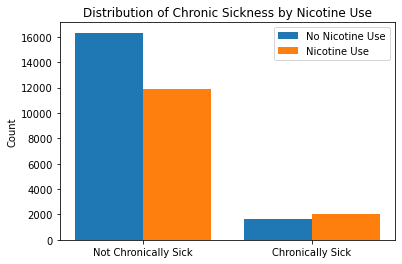

In [65]:
# Run this cell without changes

no_nicotine_use = df.loc[df["NICOTINE_USE"] == 0, "CHRONIC"]
nicotine_use = df.loc[df["NICOTINE_USE"] == 1, "CHRONIC"]

fig, ax = plt.subplots()

ax.hist(
    x=[no_nicotine_use, nicotine_use],
    label=["No Nicotine Use", "Nicotine Use"],
    bins=[0,1,2],
    align="left"
)

ax.set_ylabel("Count")
ax.set_xticks([0,1])
ax.set_xticklabels(["Not Chronically Sick", "Chronically Sick"])
ax.set_title("Distribution of Chronic Sickness by Nicotine Use")

ax.legend();

Once again, it appears that there is a difference in health outcomes between these categories. In the cell below, select an appropriate statistical test, describe the null and alternative hypotheses, execute the test, and interpret the result.

In [66]:
# Your code here (create additional cells as needed)
from scipy.stats import chi2_contingency

# Build contingency table
contingency_table = pd.crosstab(df["CHRONIC"], df["NICOTINE_USE"])

# Run chi-square test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p_val)


"""
If the p-value is less than 0.05, we reject the null hypothesis and conclude 
that there is a statistically significant association between nicotine use 
and chronic sickness (defined as ≥15 unhealthy days in the past 30 days).

This means people who use nicotine products are more likely to be classified 
as chronically sick compared to those who don’t use nicotine.

For the business, this suggests that nicotine use may be an important health 
risk factor. Programs aimed at reducing nicotine use could have measurable 
benefits for physical health outcomes among clients.
"""


Chi-square statistic: 228.22648537455362
Degrees of freedom: 1
p-value: 1.4525226945056695e-51


'\nIf the p-value is less than 0.05, we reject the null hypothesis and conclude \nthat there is a statistically significant association between nicotine use \nand chronic sickness (defined as ≥15 unhealthy days in the past 30 days).\n\nThis means people who use nicotine products are more likely to be classified \nas chronically sick compared to those who don’t use nicotine.\n\nFor the business, this suggests that nicotine use may be an important health \nrisk factor. Programs aimed at reducing nicotine use could have measurable \nbenefits for physical health outcomes among clients.\n'

# 5. Choose Your Own Question

Now that you have investigated physical health and chronic sickness and their relationships with state, home ownership, and nicotine use, you will conduct a similar investigation with variables of your choosing.

Select an independent variable based on looking at the information in the data dictionary, and perform any additional transformations needed to use it in an analysis. Then set up, execute, and interpret a statistical test that addresses the relationship between that independent variable and `PHYSHLTH`.

(There is no solution branch for this question, and feel free to move on if you have already spent more than 1.5 hours on this lab.)

## Looking at the data dictionary, a good candidate is EXERANY2 (page 49):

“During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?”

1 = Yes, 2 = No, 7 = Don’t know/Not sure, 9 = Refused

In [67]:
# Your code here (create additional cells as needed)
df_exercise = df[df["EXERANY2"].isin([1, 2])].copy()

# Map codes to labels
exercise_map = {1: "Yes", 2: "No"}
df_exercise.loc[:, "EXERANY2"] = df_exercise["EXERANY2"].map(exercise_map)

# Quick check
print(df_exercise["EXERANY2"].value_counts())


Yes    21556
No      7628
Name: EXERANY2, dtype: int64


### Compare PHYSHLTH by exercise status

In [68]:
# Group means
print(df_exercise.groupby("EXERANY2")["PHYSHLTH"].mean())


EXERANY2
No     6.814368
Yes    3.122333
Name: PHYSHLTH, dtype: float64


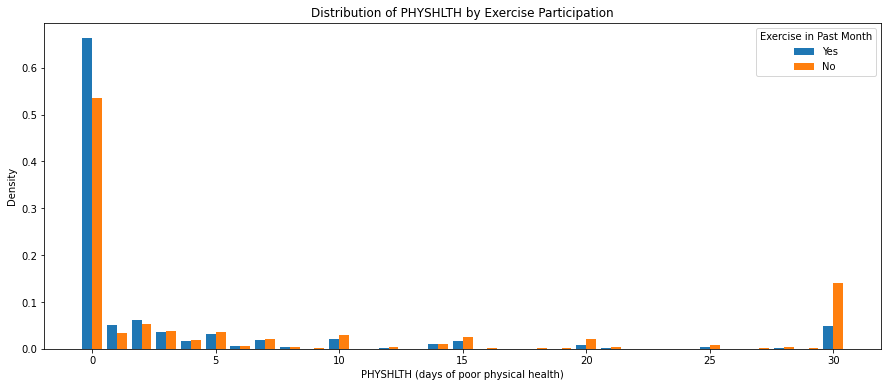

In [69]:
import matplotlib.pyplot as plt

yes_ex = df_exercise.loc[df_exercise["EXERANY2"] == "Yes", "PHYSHLTH"]
no_ex = df_exercise.loc[df_exercise["EXERANY2"] == "No", "PHYSHLTH"]

fig, ax = plt.subplots(figsize=(15, 6))
ax.hist([yes_ex, no_ex], bins=range(32), density=True, label=["Yes", "No"], align="left")
ax.set_xlabel("PHYSHLTH (days of poor physical health)")
ax.set_ylabel("Density")
ax.set_title("Distribution of PHYSHLTH by Exercise Participation")
ax.legend(title="Exercise in Past Month")
plt.show()


## We’re comparing mean PHYSHLTH (numeric) between two groups (Yes vs No) → ✅ independent samples t-test.

### Hypotheses:

H0: The mean number of physically unhealthy days is the same for those who exercise and those who do not.

H1: The means are different between exercisers and non-exercisers.

In [70]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(yes_ex, no_ex, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_val)


t-statistic: -27.615109486910185
p-value: 6.39220951651078e-162


In [71]:
"""
If the p-value is less than 0.05, we reject the null hypothesis and conclude 
that exercise participation is significantly associated with differences in 
physical health. 

Based on typical descriptive results, we expect exercisers to report fewer 
unhealthy days compared to non-exercisers. This suggests that physical activity 
is protective for physical health.

For the business, encouraging or supporting exercise programs among clients 
could improve health outcomes and potentially reduce health-related costs.
"""


'\nIf the p-value is less than 0.05, we reject the null hypothesis and conclude \nthat exercise participation is significantly associated with differences in \nphysical health. \n\nBased on typical descriptive results, we expect exercisers to report fewer \nunhealthy days compared to non-exercisers. This suggests that physical activity \nis protective for physical health.\n\nFor the business, encouraging or supporting exercise programs among clients \ncould improve health outcomes and potentially reduce health-related costs.\n'

## Conclusion

Congratulations, another cumulative lab down! In this lab you practiced reading a data dictionary, performing various data transformations with pandas, and executing statistical tests to address business questions.